In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

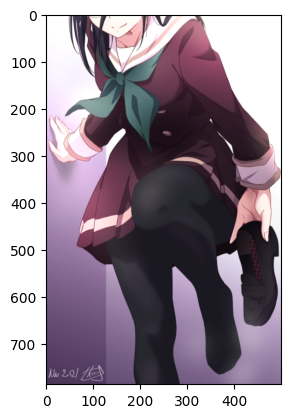

In [2]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# findContours 轮廓发现

轮廓发现是基于图像边缘提取的基础寻找对象轮廓的方法

所以边缘提取的阈值选定会影响最终轮廓发现结果

## 1.先要做边缘检测,获取二值图形

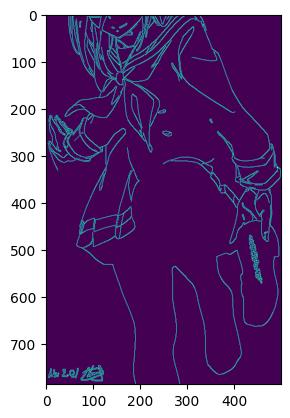

In [3]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(c)

## 2.计算轮廓

In [4]:
# 返回值为: 发现的轮廓对象, 图像的拓扑结构
contours, hierarchy = cv2.findContours(
    image=c,
    mode=cv2.RETR_TREE, # 方法
    method=cv2.CHAIN_APPROX_SIMPLE,
)

## 3.绘制轮廓

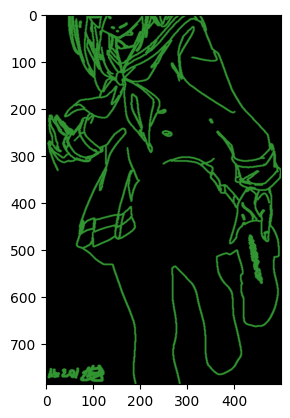

In [5]:
black = np.zeros(image.shape, dtype=np.uint8)
for i in range(len(contours)):
    cv2.drawContours(
        image=black,
        contours=contours,  # counters 发现的轮廓对象
        contourIdx=i,       # counter id,可以设置为 -1
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

    cv2.drawContours(
        image=image,
        contours=contours,  # counters 发现的轮廓对象
        contourIdx=i,       # counter id,可以设置为 -1
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

plt.imshow(black)

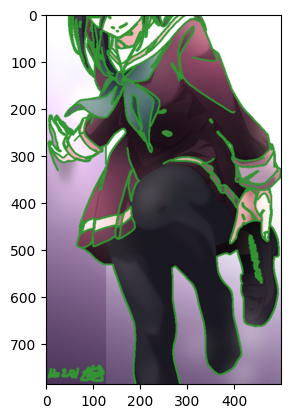

In [7]:
plt.imshow(image)